In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV



donor_info = pd.read_csv('customer_churn.csv', low_memory=False)

donor_info.head(1)

,Customer_Name,Age,Total_Donation,Over_50k,Donation_Time,Education_Level,Onboard_Date,Customer_Location,Company_Name,Churn
0,Cameron Williams,42.0,11066.8,0,7.22,8.0,2013-08-30 07:00:40,"10265 Elizabeth Mission Barkerburgh, AK 89518",Harvey LLC,1



The models provide feature importance scores. I am Analyzing these scores to understand which features are most influential in making predictions.


In [243]:
feature_importances = best_model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)


           Feature  Importance
4  Education_Level    0.701264
3    Donation_Time    0.200454
0              Age    0.035537
1   Total_Donation    0.034863
2         Over_50k    0.027883


In [200]:
#features (X) and target (y)

X = donor_info[['Age', 'Total_Donation', 'Over_50k', 'Donation_Time', 'Education_Level']]
y = donor_info['Churn']



In [201]:
# training and testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [202]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (720, 5)
X_test shape: (180, 5)
y_train shape: (720,)
y_test shape: (180,)


Logistic Rogression Model

In [203]:
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train, y_train)

/Users/habeelabdi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [204]:
y_pred_lr = model_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
precision_lr = precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
roc_auc_lr = roc_auc_score(y_test, y_pred_lr)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)


In [205]:
print("Logistic Regression Metrics:")
print("Accuracy:", accuracy_lr)
print("Precision:", precision_lr)
print("Recall:", recall_lr)
print("F1 Score:", f1_lr)
print("ROC AUC Score:", roc_auc_lr)
print("Confusion Matrix:\n", conf_matrix_lr)

Logistic Regression Metrics:
Accuracy: 0.8388888888888889
Precision: 0.6363636363636364
Recall: 0.21875
F1 Score: 0.32558139534883723
ROC AUC Score: 0.5958614864864865
Confusion Matrix:
 [[144   4]
 [ 25   7]]


Random Forest Model

In [206]:
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [207]:

y_pred_rf = model_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

In [208]:
print("Random Forest Metrics:")
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("Recall:", recall_rf)
print("F1 Score:", f1_rf)
print("ROC AUC Score:", roc_auc_rf)
print("Confusion Matrix:\n", conf_matrix_rf)

Random Forest Metrics:
Accuracy: 0.8722222222222222
Precision: 0.7368421052631579
Recall: 0.4375
F1 Score: 0.5490196078431373
ROC AUC Score: 0.7018581081081081
Confusion Matrix:
 [[143   5]
 [ 18  14]]


Grading Boosting Classifier 

In [209]:
model_gb = GradientBoostingClassifier(random_state=42)
model_gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [210]:

y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

In [211]:
print("Gradient Boosting Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("ROC AUC Score:", roc_auc_gb)
print("Confusion Matrix:\n", conf_matrix_gb)

Gradient Boosting Metrics:
Accuracy: 0.9
Precision: 0.7692307692307693
Recall: 0.625
F1 Score: 0.6896551724137931
ROC AUC Score: 0.7922297297297297
Confusion Matrix:
 [[142   6]
 [ 12  20]]


Model Comparison:
                 Model  Accuracy  Precision   Recall  F1 Score  ROC AUC Score
0  Logistic Regression  0.838889   0.636364  0.21875  0.325581       0.595861
1        Random Forest  0.872222   0.736842  0.43750  0.549020       0.701858
2    Gradient Boosting  0.900000   0.769231  0.62500  0.689655       0.792230


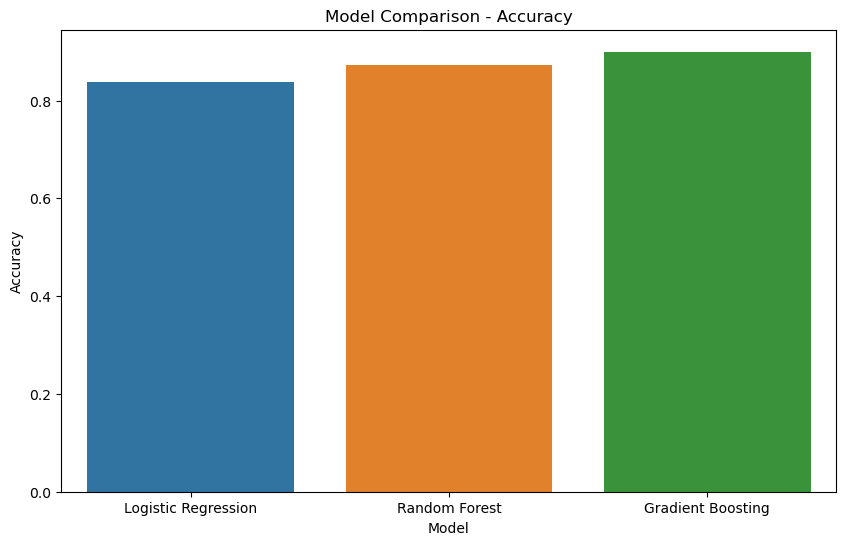

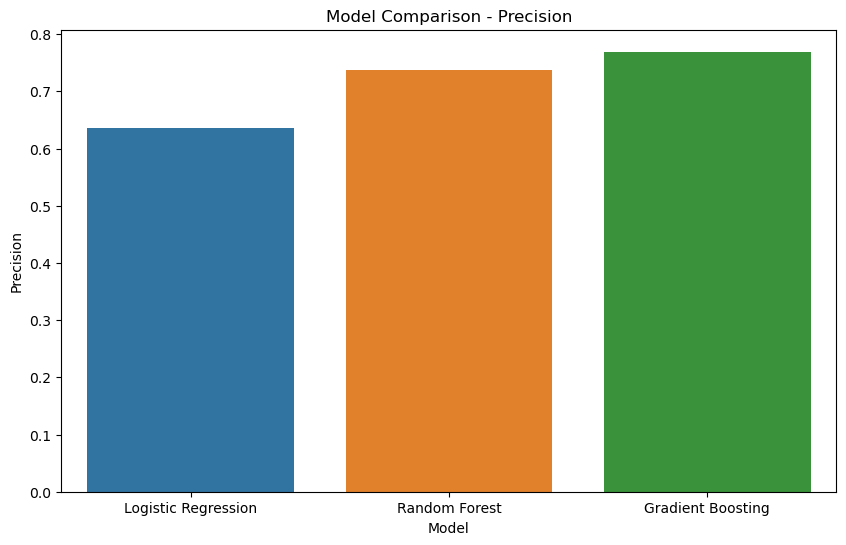

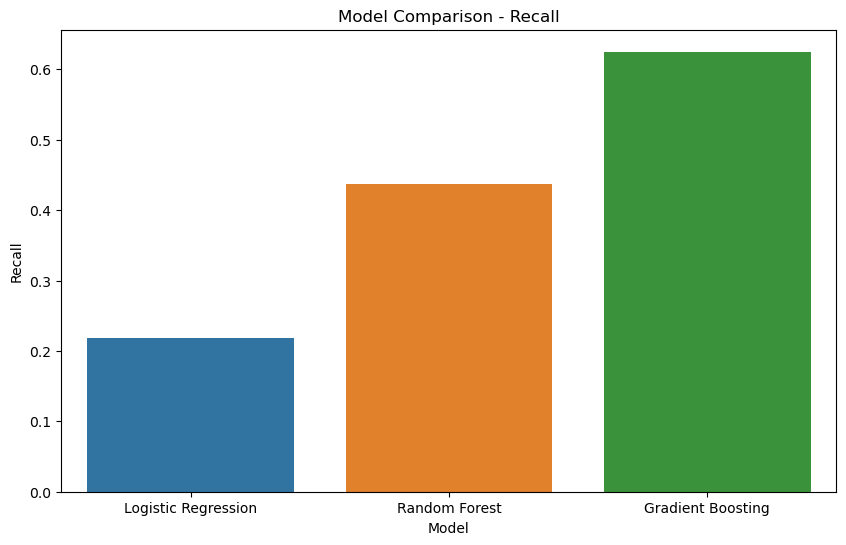

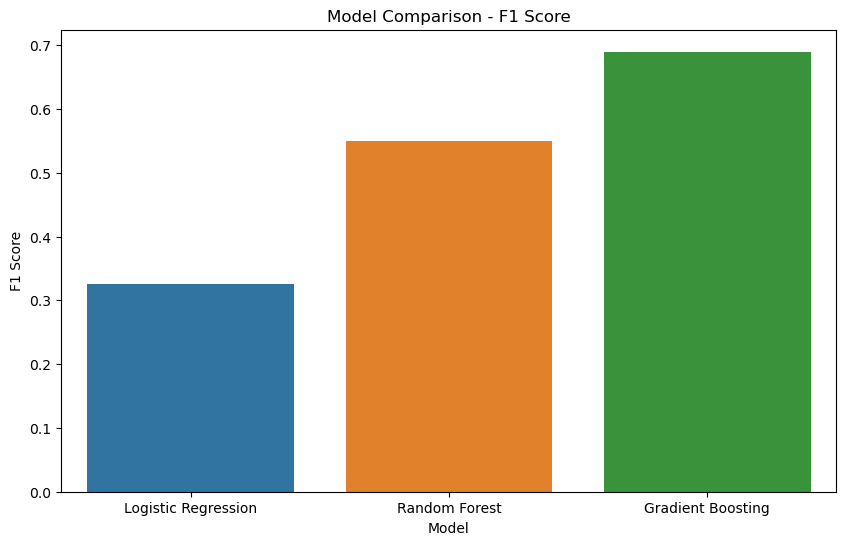

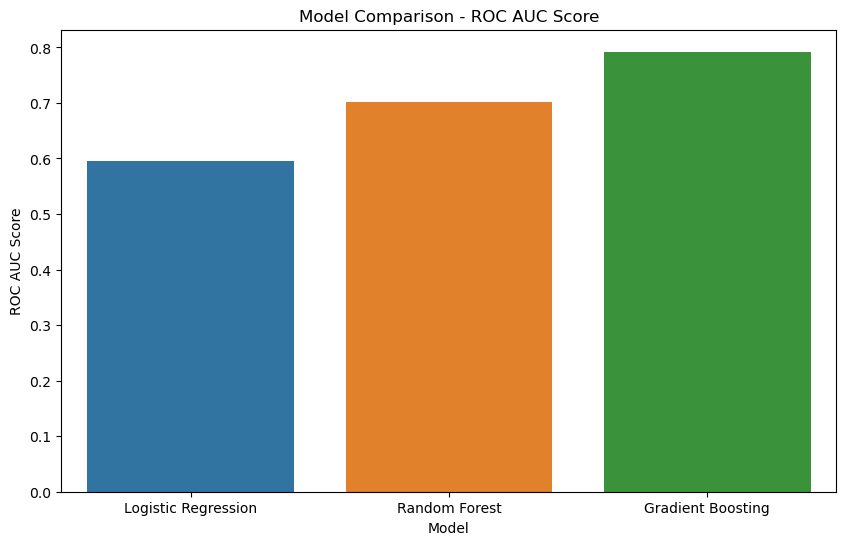

Best-performing model: Gradient Boosting


In [212]:
model_comparison = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'Gradient Boosting'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_gb],
    'Precision': [precision_lr, precision_rf, precision_gb],
    'Recall': [recall_lr, recall_rf, recall_gb],
    'F1 Score': [f1_lr, f1_rf, f1_gb],
    'ROC AUC Score': [roc_auc_lr, roc_auc_rf, roc_auc_gb]
})

print("Model Comparison:")
print(model_comparison)

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=model_comparison)
plt.title('Model Comparison - Accuracy')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Precision', data=model_comparison)
plt.title('Model Comparison - Precision')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Recall', data=model_comparison)
plt.title('Model Comparison - Recall')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='F1 Score', data=model_comparison)
plt.title('Model Comparison - F1 Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC Score', data=model_comparison)
plt.title('Model Comparison - ROC AUC Score')
plt.show()

best_model = model_comparison.loc[model_comparison['Accuracy'].idxmax(), 'Model']
print("Best-performing model:", best_model)

Although Gradient Boosting was the best model, this does not stop us from taking part in some hyperparameter tuning to futher enhance the Gradient Boosting model 


I will do this by finding the optimal combination of hyperparameters that result in the best model performance. With techniques like Grid Search and or Random Search

In [296]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

param_grid = {
    'n_estimators': [50, 100, 150],  # Number of boosting stages to be run
    'learning_rate': [0.05, 0.1, 0.2],  # Shrinkage to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}


In [297]:

#Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

#GridSearchCV object
grid_search = GridSearchCV(gb_model, param_grid, scoring='precision', cv=5)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.05, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='precision')

In [271]:

#best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [287]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Tuned 2nd Gradient Boosting Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

Tuned 2nd Gradient Boosting Metrics:
Accuracy: 0.889
Precision: 0.773
Recall: 0.531
F1 Score: 0.630
ROC AUC Score: 0.749
Confusion Matrix:
[[143   5]
 [ 15  17]]


In [287]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Tuned 2nd Gradient Boosting Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

Tuned 2nd Gradient Boosting Metrics:
Accuracy: 0.889
Precision: 0.773
Recall: 0.531
F1 Score: 0.630
ROC AUC Score: 0.749
Confusion Matrix:
[[143   5]
 [ 15  17]]


In [288]:
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Tuned Gradient Boosting Metrics:")
print(f"Accuracy: {accuracy:.3f}")
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"F1 Score: {f1:.3f}")
print(f"ROC AUC Score: {roc_auc:.3f}")
print("Confusion Matrix:")
print(conf_matrix)

Tuned Gradient Boosting Metrics:
Accuracy: 0.889
Precision: 0.773
Recall: 0.531
F1 Score: 0.630
ROC AUC Score: 0.749
Confusion Matrix:
[[143   5]
 [ 15  17]]


In [289]:
y_pred_gb = model_gb.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
precision_gb = precision_score(y_test, y_pred_gb)
recall_gb = recall_score(y_test, y_pred_gb)
f1_gb = f1_score(y_test, y_pred_gb)
roc_auc_gb = roc_auc_score(y_test, y_pred_gb)
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)

In [290]:
print("Original Gradient Boosting Metrics:")
print("Accuracy:", accuracy_gb)
print("Precision:", precision_gb)
print("Recall:", recall_gb)
print("F1 Score:", f1_gb)
print("ROC AUC Score:", roc_auc_gb)
print("Confusion Matrix:\n", conf_matrix_gb)

Original Gradient Boosting Metrics:
Accuracy: 0.9
Precision: 0.7692307692307693
Recall: 0.625
F1 Score: 0.6896551724137931
ROC AUC Score: 0.7922297297297297
Confusion Matrix:
 [[142   6]
 [ 12  20]]


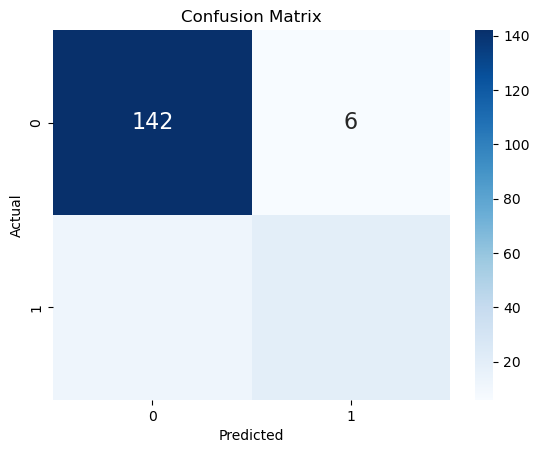

In [291]:


cm = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


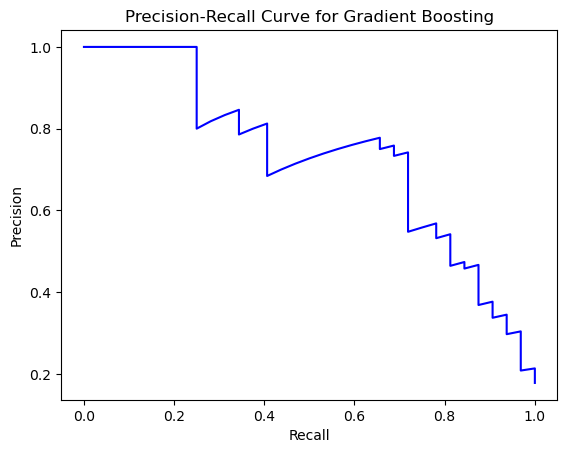

In [292]:

y_scores_gb = model_gb.predict_proba(X_test)[:, 1]

precision_gb, recall_gb, _ = precision_recall_curve(y_test, y_scores_gb)

plt.plot(recall_gb, precision_gb, color='blue')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Gradient Boosting')
plt.show()


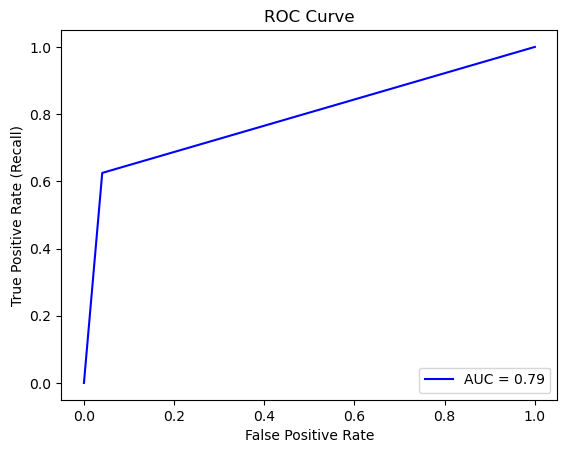

In [293]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_gb)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='blue', label=f'AUC = {roc_auc:.2f}')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


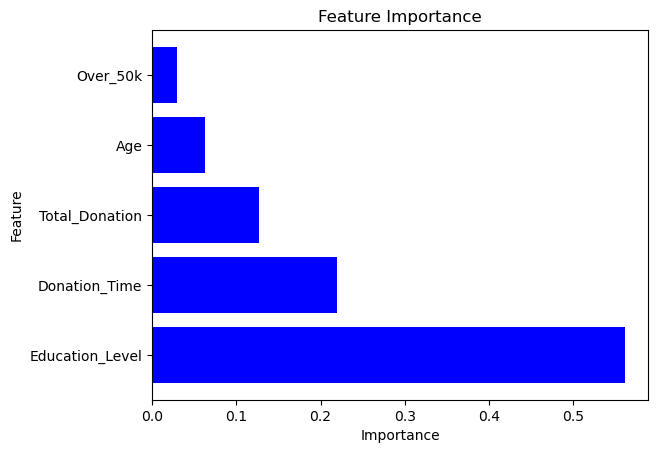

In [294]:


feature_names = ['Age', 'Total_Donation', 'Over_50k', 'Donation_Time', 'Education_Level']

feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': model_gb.feature_importances_})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [295]:
+-------------------+----------+--------+---------+---------+
|      Metric       | Original | Tuned 1| Tuned 2 |  Model  |
+-------------------+----------+--------+---------+---------+
| Accuracy          | 0.900    | 0.883  | 0.889   |   GB    |
| Precision         | 0.769    | 0.739  | 0.773   |   GB    |
| Recall            | 0.625    | 0.531  | 0.531   |   GB    |
| F1 Score          | 0.690    | 0.618  | 0.630   |   GB    |
| ROC AUC Score     | 0.792    | 0.745  | 0.749   |   GB    |
+-------------------+----------+--------+---------+---------+

SyntaxError: invalid syntax (2455863820.py, line 1)